# Raw Extraction of required data

Note that the raw extraction of required data takes a very long time, the import of pre-computed values is avaliable at the Plotting Code section.

In [1]:
import pandas as pd
import numpy as np
import tqdm
import csv
from datetime import datetime

In [2]:
# Defining the list indexes
indexes = {
    'Malware':0,
    'Phishing':1,
    'Exploits':2,
    'Fraudlent Services':3,
    'Unwanted Programs':4,
    'Spammers':5,
    'Unlabelled':6,
}

attack_map = ['Malware', 'Phishing', 'Exploits', 'Fraudlent Services',
            'Unwanted Programs', 'Spammers', 'Unlabelled']

In [3]:
# Convert date fields back into a python date object
date_calculation_cache = {}
def make_date(day, month, year, iso=True):
    date = '%s-%s-%s' % (day, month, year)
    # Check cache before recomputation
    if date not in date_calculation_cache:
        if iso:
            cal = datetime.strptime(date, "%d-%m-%Y").isocalendar()
        else:
            cal = datetime.strptime(date, "%d-%m-%Y")
        date_calculation_cache[date] = cal
    else:
        cal = date_calculation_cache[date]
    return cal

In [4]:
# Initialise a dictionary to hold all our data.
# We will later convert this into a pandas dataframe for easy processing
ip_in_asn = {}

for attack in indexes:
    print(attack)
    files = []
    if attack == 'Unlabelled':
        # There are 23 files containing Unlabelled reports
        for i in range(23):
            files.append(('./../../Datastore/%s_reports_%s.csv'%(attack,i), attack, i))
    else:
        #continue
        files.append(('./../../Datastore/%s_reports.csv'%attack, attack, None))
    #########################
    
    # Process the files
    for file_name, a, file_num in files:
        print(file_name)
        with open(file_name) as data_file:
            filereader = csv.reader(data_file)
            if attack == 'Unlabelled':
                activity_relabel = pd.read_csv('./../../Unlabelled_predictions/%s_predictions_%s.csv'%(a, file_num),
                                               index_col=[0], header=None)
                activity_relabel = activity_relabel.transpose().values[0]
            for n, report in enumerate(tqdm.tqdm(filereader)):
                try:
                    # Unpack Row information
                    splits = report[0:9]

                    day = splits[5]
                    month = splits[6]
                    year = splits[7]
                    datasource = splits[8]        
                    org = splits[3]
                    asn = splits[2]
                    cc = splits[1]
                    ip = splits[0]
                    
                    # Compute week bins
                    cal = make_date(day, month, year, iso=False)
                    year_num, week_num, weekday_num = cal.isocalendar()

                    # Invalid Timestamp, likely 0.
                    if year_num == 1970:
                        continue
                    week = (year_num-1970)*52 + week_num

                except Exception, e: 
                    print(str(e))

                if ip is None or ip == '':
                    print("Skipping invalid IP: %s" % ip)
                    continue

                if (attack == 'Unlabelled'):
                    attack_label = attack_map[activity_relabel[n]]
                else:
                    attack_label = attack

                # Initialise the holders
                key = asn
                if key not in ip_in_asn:
                    ip_in_asn[key] = {}

                if attack_label not in ip_in_asn[key]:
                    ip_in_asn[key][attack_label] = set([])
                    
                # Add IP to country set
                ip_in_asn[key][attack_label].add(ip)

print('Finished')

6918it [00:00, 51672.35it/s]
0it [00:00, ?it/s]

Spammers
./../../Datastore/Spammers_reports.csv
Malware
./../../Datastore/Malware_reports.csv


3190529it [00:24, 128386.21it/s]
11446it [00:00, 114429.01it/s]

Exploits
./../../Datastore/Exploits_reports.csv


201108it [00:01, 105799.87it/s]
11497it [00:00, 114467.41it/s]

Phishing
./../../Datastore/Phishing_reports.csv


2382889it [00:15, 149719.02it/s]
14166it [00:00, 141624.34it/s]

Fraudlent Services
./../../Datastore/Fraudlent Services_reports.csv


829301it [00:05, 157876.00it/s]
13003it [00:00, 129992.00it/s]

Unwanted Programs
./../../Datastore/Unwanted Programs_reports.csv


698700it [00:04, 154646.15it/s]


Unlabelled
./../../Datastore/Unlabelled_reports_0.csv


/Users/zha197/.local/lib/python2.7/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
2000138it [00:14, 133747.05it/s]


./../../Datastore/Unlabelled_reports_1.csv


2000007it [00:14, 135045.64it/s]


./../../Datastore/Unlabelled_reports_2.csv


2000047it [00:14, 133340.48it/s]


./../../Datastore/Unlabelled_reports_3.csv


2000022it [00:14, 138609.94it/s]


./../../Datastore/Unlabelled_reports_4.csv


2000471it [00:15, 129505.12it/s]


./../../Datastore/Unlabelled_reports_5.csv


2000567it [00:14, 134494.13it/s]


./../../Datastore/Unlabelled_reports_6.csv


2000130it [00:15, 126418.49it/s]


./../../Datastore/Unlabelled_reports_7.csv


2000541it [00:14, 135803.00it/s]


./../../Datastore/Unlabelled_reports_8.csv


2000282it [00:14, 141186.11it/s]


./../../Datastore/Unlabelled_reports_9.csv


2000016it [00:13, 145544.98it/s]


./../../Datastore/Unlabelled_reports_10.csv


2000165it [00:14, 134491.83it/s]


./../../Datastore/Unlabelled_reports_11.csv


2000021it [00:14, 139789.47it/s]


./../../Datastore/Unlabelled_reports_12.csv


2000114it [00:14, 135087.46it/s]


./../../Datastore/Unlabelled_reports_13.csv


2000038it [00:14, 141860.08it/s]


./../../Datastore/Unlabelled_reports_14.csv


2000304it [00:13, 151260.96it/s]


./../../Datastore/Unlabelled_reports_15.csv


2000019it [00:14, 133378.04it/s]


./../../Datastore/Unlabelled_reports_16.csv


2000455it [00:14, 133676.92it/s]


./../../Datastore/Unlabelled_reports_17.csv


2000040it [00:15, 126344.81it/s]


./../../Datastore/Unlabelled_reports_18.csv


2000023it [00:14, 140059.44it/s]


./../../Datastore/Unlabelled_reports_19.csv


2000058it [00:13, 145268.07it/s]


./../../Datastore/Unlabelled_reports_20.csv


2000016it [00:13, 148890.81it/s]


./../../Datastore/Unlabelled_reports_21.csv


2000294it [00:13, 145683.26it/s]
0it [00:00, ?it/s]

./../../Datastore/Unlabelled_reports_22.csv


332782it [00:02, 154123.32it/s]

Finished


## Compute Unique IPs

In [5]:
asn_uniq_ips = {}
asn_exceptions = ['--', 'xx', 'A1', 'unknown', 'nan', '-1']

for asn in ip_in_asn:
    if asn in asn_exceptions:
        continue
        
    for attack in ip_in_asn[asn]:
        if asn not in asn_uniq_ips:
            asn_uniq_ips[asn] = {}
            asn_uniq_ips[asn]['Totals'] = 0
        asn_uniq_ips[asn][attack] = len(ip_in_asn[asn][attack])
        asn_uniq_ips[asn]['Totals'] = asn_uniq_ips[asn]['Totals'] + asn_uniq_ips[asn][attack]
    

In [6]:
import pandas as pd
asn_ip_unique_df = pd.DataFrame(asn_uniq_ips)
asn_ip_unique_df = asn_ip_unique_df.fillna(0)

asn_ip_unique_df.to_csv("asn_ip_unique.csv")

asn_ip_unique_df

,-42473,0,100,10000,10001,10002,10006,10010,10013,10015,...,9946,9950,9954,9971,9976,9980,9981,9982,9988,9993
Exploits,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Fraudlent Services,1.0,2.0,0.0,0.0,0.0,0.0,0.0,22.0,6.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Malware,0.0,6.0,1.0,3.0,1.0,1.0,7.0,43.0,31.0,1.0,...,13.0,1.0,1.0,1.0,42.0,3.0,13.0,1.0,1.0,2.0
Phishing,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
Spammers,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Totals,1.0,8.0,2.0,4.0,1.0,1.0,8.0,72.0,39.0,13.0,...,13.0,1.0,1.0,1.0,42.0,3.0,13.0,1.0,3.0,5.0
Unwanted Programs,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0


## Compute Proportions

In [38]:
# Import the AS block sizes from the other generator script
import pandas as pd
as_block_size = pd.read_csv('./Generators/asn_block_sizes.csv', index_col=[0])
as_block_size.index = as_block_size.index.astype(str)
as_block_size = as_block_size.to_dict()['0']


In [40]:
missing_counter = set([])
zero_counter = set([])
# Compute the porportions
asn_ip_porportion = {}
for asn in asn_uniq_ips:
    # See if we have a block size for this cc
    if asn not in as_block_size:
        missing_counter.add(asn)
        continue
        
    # Retrieve the block size for cc
    asn_total = as_block_size[asn]
    
    if asn_total == 0:
        zero_counter.add(asn)
        continue
        
    
    # For all recorded attacks, compute a porportion
    for attack in asn_uniq_ips[asn]:
        if asn not in asn_ip_porportion:
            asn_ip_porportion[asn] = {}
        asn_ip_porportion[asn][attack] = 100 * float(asn_uniq_ips[asn][attack])/asn_total

#asn_ip_porportion
print 'Missing ASN'
print len(missing_counter)
print 'Zero ASN'
print len(zero_counter)
print 'Porportioned ASN'
print len(asn_ip_porportion)

Missing ASN
537
Zero ASN
11
Porportioned ASN
12402


In [44]:
import cPickle
import pandas as pd
asn_ip_porportion_df = pd.DataFrame(asn_ip_porportion)
asn_ip_porportion_df = asn_ip_porportion_df.fillna(0)

asn_ip_porportion_df.to_csv("asn_attack_proportions.csv")

asn_ip_porportion_df

,100,10000,10001,10002,10006,10010,10013,10015,10019,10021,...,9946,9950,9954,9971,9976,9980,9981,9982,9988,9993
Exploits,0.000000,0.001480,0.000000,0.000000,0.00152,0.000085,0.000039,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
Fraudlent Services,0.000000,0.000000,0.000000,0.000000,0.00000,0.000620,0.000233,0.003997,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
Malware,0.004542,0.004439,0.002713,0.000822,0.01064,0.001212,0.001206,0.000363,0.002111,0.000508,...,0.011335,0.001322,0.009527,0.001742,0.03155,0.017491,0.009545,0.007972,0.008311,0.002123
Phishing,0.000000,0.000000,0.000000,0.000000,0.00000,0.000028,0.000039,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.016622,0.000000
Spammers,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
Totals,0.009084,0.005919,0.002713,0.000822,0.01216,0.002029,0.001518,0.004724,0.002111,0.001270,...,0.011335,0.001322,0.009527,0.001742,0.03155,0.017491,0.009545,0.007972,0.024934,0.005307
Unwanted Programs,0.004542,0.000000,0.000000,0.000000,0.00000,0.000085,0.000000,0.000363,0.000000,0.000762,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.003184


# Plotting Code

## Load Existing Data

In [46]:
import pandas as pd
as_block_size = pd.read_csv('./Generators/asn_block_sizes.csv', index_col=[0])
as_block_size.index = as_block_size.index.astype(str)
as_block_size = as_block_size.to_dict()['0']

asn_ip_porportion_df = pd.read_csv('asn_attack_proportions.csv', index_col=[0], header=[0])
asn_ip_unique_df = pd.read_csv('asn_ip_unique.csv', index_col=[0], header=[0])


## Highest Proportion ASs

In [47]:
import pandas as pd
ip_df = pd.DataFrame(asn_ip_porportion_df)
ip_df = ip_df.fillna(0)

for attk in ip_df.transpose():
    
    if attk != 'Totals':
        continue

    top10 = ip_df.transpose()[attk].sort_values(ascending=False).head(20).index

    names = ['AS','Proportion','Unique Malicious IPs','Total Block Size']

    top_list = []
    for one in top10:
        top_list.append((one, ip_df.transpose()[attk][one],
                         asn_ip_unique_df[one][attk], as_block_size[one]))

    a = pd.DataFrame(top_list)
    a.columns = names
    print attk
    print a.set_index('AS')

Totals
        Proportion  Unique Malicious IPs  Total Block Size
AS                                                        
31624    57.582721                2506.0              4352
44901    44.531250                 114.0               256
54761    33.671875                 431.0              1280
133618   27.050781                 277.0              1024
49087    26.562500                  68.0               256
45020    25.390625                  65.0               256
61969    23.242188                 238.0              1024
47583    20.133464                3711.0             18432
22612    19.764365                3137.0             15872
51468    18.398438                 942.0              5120
49236    18.359375                  94.0               512
29004    17.578125                  90.0               512
20068    16.992188                 174.0              1024
49806    14.843750                  38.0               256
56464    14.843750                  38.0         

## Plotting Parameters

In [48]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import dateutil.relativedelta

plot_properties_indexes = {
    'Unwanted Programs':{'color':'b', 'linestyle':'-', 'label':'PUP',
                         'marker':'s', 'hatch':'//'},

    'Fraudlent Services':{'color':'y', 'linestyle':'-', 'label':'Fraud. Serv.',
                          'marker':'*','hatch':'\\'},

    'Malware':{'color':'r', 'linestyle':'-', 'label':'Malware',
               'marker':'x', 'hatch':'x'},

    'Exploits':{'color':'m', 'linestyle':'-', 'label':'Exploits',
                'marker':'+', 'hatch':'+'},

    'Phishing':{'color':'g', 'linestyle':'-', 'label':'Phishing',
                'marker':'^', 'hatch':'|'},

    'Spammers':{'color':'c', 'linestyle':'-', 'label':'Spammers',
                'marker':'D', 'hatch':'\\\\'},

    'Unlabelled':{'color':'w', 'linestyle':'-', 'label':'Unlabelled',
                  'marker':'T', 'hatch':'///'},

    'Totals':{'color':'k', 'linestyle':'-', 'label':'Total',
              'marker':'o', 'hatch':''}
}

In [49]:
import matplotlib.pyplot as plt
import numpy as np

def cdf(data, m,n,s,lstring):
    data_size=len(data)

    # Set bins edges
    data_set=sorted(set(data))
    bins=np.append(data_set, data_set[-1]+1)

    # Use the histogram function to bin the data
    counts, bin_edges = np.histogram(data, bins=bins, density=False)
    #print counts
    #print bin_edges
    counts=counts.astype(float)/data_size

    # Find the cdf
    cdf = np.cumsum(counts)
    
    # Plot the cdf
    plt.plot(bin_edges[0:-1], cdf,linestyle='%s'%n, color='%s'%m,marker='%s'%s,markevery=0.1, label=lstring)    
    plt.ylim((0,1))

# CDF of AS Proportions

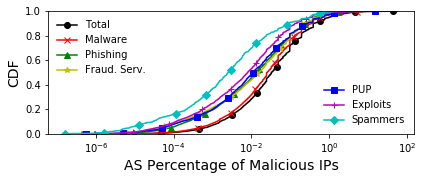

In [57]:
plt.figure(figsize=(6,2.6))

for attk in ['Totals', 'Malware', 'Phishing', 'Fraudlent Services', 'Unwanted Programs', 
             'Exploits', 'Spammers']:
    a = asn_ip_porportion_df.transpose()[attk][asn_ip_porportion_df.transpose()[attk]!=0]
    linestyle = plot_properties_indexes[attk]['linestyle']
    color = plot_properties_indexes[attk]['color']
    label = plot_properties_indexes[attk]['label']
    marker = plot_properties_indexes[attk]['marker']
    
    cdf(a, color, linestyle, marker, label)

plt.ylabel("CDF",fontsize=14)
plt.xlabel("AS Percentage of Malicious IPs",fontsize=14)

plt.xscale('log')

import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

# New Legend Code
ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
offset_split = 4
l1 = ax.legend(handles[:offset_split], labels[:offset_split], loc='upper left',frameon=False)
l2 = ax.legend(handles[offset_split:], labels[offset_split:], loc='lower right',frameon=False) # this removes l1 from the axes.
ax.add_artist(l1)


plt.savefig("figures/asn_proportion_big.pdf",bbox_inches='tight')
plt.show()

# Additional Analysis

In [32]:
#Check ratios for AS31624
check_as = '31624'
print(asn_ip_porportion_df[check_as])
print(as_block_size[check_as])

Exploits               7.697610
Fraudlent Services     7.306985
Malware               38.258272
Phishing               4.136029
Spammers               0.068934
Totals                57.582721
Unwanted Programs      0.114890
Name: 31624, dtype: float64
4352


In [34]:
#Check ratios for AS44901
check_as = '44901'
print(asn_ip_porportion_df[check_as])
print(as_block_size[check_as])

Exploits               2.343750
Fraudlent Services    14.062500
Malware               19.140625
Phishing               8.203125
Spammers               0.000000
Totals                44.531250
Unwanted Programs      0.781250
Name: 44901, dtype: float64
256


In [33]:
#Check ratios for AS54761
check_as = '54761'
print(asn_ip_porportion_df[check_as])
print(as_block_size[check_as])

Exploits               2.656250
Fraudlent Services     0.000000
Malware               29.531250
Phishing               0.703125
Spammers               0.000000
Totals                33.671875
Unwanted Programs      0.781250
Name: 54761, dtype: float64
1280


In [43]:
a = asn_ip_porportion_df.loc['Totals']

len_check = len(a[a > 1])
total_len = len(a)

print(len_check)
print(total_len)
print(1.0*len_check/total_len)

616
12402
0.04966940816


In [44]:
#Check ratios for AS20940
check_as = '20940'
print(asn_ip_porportion_df[check_as])
print(as_block_size[check_as])

Exploits              0.013659
Fraudlent Services    0.010825
Malware               0.172790
Phishing              0.065371
Spammers              0.000000
Totals                0.493412
Unwanted Programs     0.230768
Name: 20940, dtype: float64
5505536


In [45]:
#Check ratios for AS14618
check_as = '14618'
print(asn_ip_porportion_df[check_as])
print(as_block_size[check_as])

Exploits              0.044271
Fraudlent Services    0.043670
Malware               0.464695
Phishing              0.143695
Spammers              0.000886
Totals                1.363890
Unwanted Programs     0.666674
Name: 14618, dtype: float64
6322432
